# **Practicum - 1**
---
*Iris Classification with Perceptron*

## **Importing Libraries**

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **Load Data and Visualization**

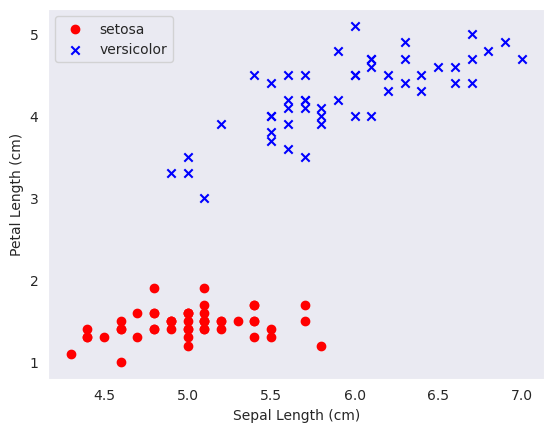

In [137]:
# Read the CSV file
df = pd.read_csv('data/Iris.csv', header=0)

# Filter the DataFrame for different Iris species
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']
virginica = df[df['Species'] == 'Iris-virginica']

# Define the columns to plot
a, b = 'SepalLengthCm', 'PetalLengthCm'

# Create scatter plots for setosa and versicolor
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

# Label the plot
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(loc='upper left')
plt.grid()

# Show the plot
plt.show()

## **Creat Perceptron Class**

In [138]:
class Perceptron:
    def __init__(self, eta: float = 0.01, n_iter: int = 10):
        # Initialize the learning rate (eta) and the number of iterations (n_iter)
        self.eta = eta
        self.n_iter = n_iter
        self.w_ = []
        self.errors_ = []

    def fit(self, X: np.ndarray, y: np.ndarray) -> 'Perceptron':
        # Initialize weights to zeros, with one extra for the bias term
        self.w_ = np.zeros(1 + X.shape[1])
        # List to store the number of misclassifications in each epoch
        self.errors_ = []

        # Iterate over the number of epochs
        for _ in range(self.n_iter):
            errors = 0
            # Iterate over each sample and its corresponding target value
            for xi, target in zip(X, y):
                # Calculate the update value
                update = self.eta * (target - self.predict(xi))
                # Update the bias term
                self.w_[0] += update
                # Update the weights
                self.w_[1:] += update * xi
                # Increment the error count if there was an update
                errors += int(update != 0.0)
            # Append the number of errors for this epoch
            self.errors_.append(errors)
        return self

    def net_input(self, X: np.ndarray) -> np.ndarray:
        # Calculate the net input (weighted sum plus bias)
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Return the class label after applying the step function
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## **Select Data and Encode Labels**

In [139]:
# Select the first 100 data points
y = df.iloc[0:100, 5].values

# Encode labels: 'Iris-setosa' as -1, others as 1
y = np.where(y == 'Iris-setosa', -1, 1)

# Slice training data and convert to float
# Ensure to select only numeric columns
X = df.iloc[0:100, [1, 4]].astype(float).values

# Initialize and fit the Perceptron model
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

## **visualize the number of errors per epoch**

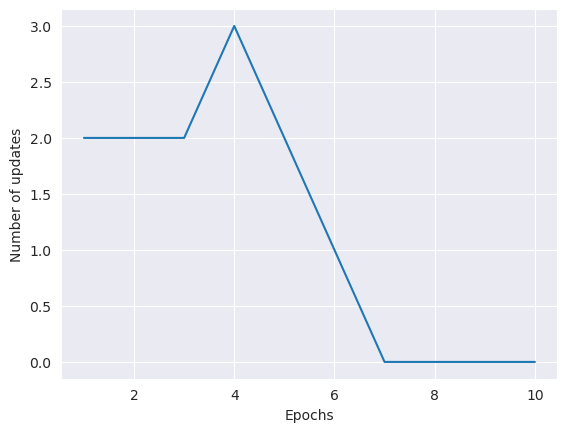

In [140]:
# Plot the number of errors per epoch
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## **function to plot the decision boundary for a classifier**

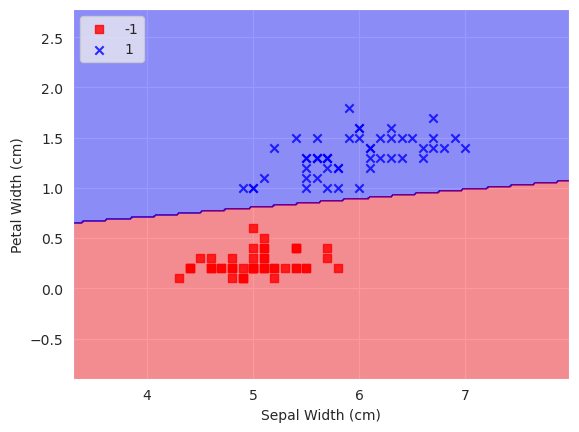

In [141]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=cmap(i), marker=markers[i], label=cl)
    plt.xlabel('Sepal Width (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.legend(loc='upper left')
    plt.show()

# Example usage with the Perceptron model
plot_decision_regions(X, y, classifier=ppn)